In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [3]:
def calcular_distancia(p1, p2):
    # Calcular la distancia euclidiana entre dos puntos
    return np.sqrt(np.sum(p2 - p1)**2)

In [10]:
def knn(datos_train, categorias, dato_clasificar, k):
    # Implementación del algoritmo KNN
    # datos_train = Conjunto de datos de entrenamiento
    # categorias = Arreglo de etiquetas
    # dato_clasificar = Dato que queremos categorizar
    # k = número de vecinos cercanos
    distancias = []
    for i in range(len(datos_train)):
        distancia = calcular_distancia(datos_train[i], dato_clasificar)
        distancias.append((distancia, categorias[i]))
    # Ordenar las distancias por tamaño
    distancias.sort(key=lambda x: x[0])
    vecinos = distancias[:k]
    clases = {}
    for vecino in vecinos:
        etiqueta = vecino[1]
        if etiqueta in clases:
            clases[etiqueta] += 1
        else:
            clases[etiqueta] = 1
    clase_predicha = max(clases, key=clases.get)

    return clase_predicha

In [5]:
# Cargar datos de iris
iris = load_iris()
X = iris.data
y = iris.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Validación cruzada para encontrar el k (vecinos) ideal
folds = 5
# Diferentes valores k para saber el ideal
valores_k = [1, 2, 5, 10, 20]
# Arreglo de accuracy para calcular el mejor accuracy
accuracies = []

In [11]:
for k in valores_k:
    # Entrenar el modelo para obtener el accuracy por cada k
    tam_fold = len(X_train) // folds # División del dataset
    fold_accuracies = []
    for i in range(folds):
        datos_test = X_train[i*tam_fold:(i+1)*tam_fold]
        datos_train_fold = np.concatenate([X_train[:i*tam_fold], 
                                           X_train[(i+1)*tam_fold:]])
        etiquetas_test = y_train[i*tam_fold:(i+1)*tam_fold]
        etiquetas_train_fold = np.concatenate([y_train[:i*tam_fold], 
                                               y_train[(i+1)*tam_fold:]])
        predicciones = []
        # Hacer las predicciones con KNN
        for j in range(len(datos_test)):
            clase_predicha = knn(datos_train_fold, etiquetas_train_fold, datos_test[j], k)
            predicciones.append(clase_predicha)
        # Evaluar el modelo
        accuracy = np.mean(predicciones == etiquetas_test)
        fold_accuracies.append(accuracy)
    prom_accuracy = np.mean(fold_accuracies)
    accuracies.append(prom_accuracy)
mejor_k = valores_k[np.argmax(accuracies)]

In [13]:
preds = []

In [14]:
for i in X_test:
    clase = knn(X_train, y_train, i, mejor_k)
    preds.append(clase)

In [16]:
# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, average='weighted')
recall = recall_score(y_test, preds, average='weighted')

In [17]:
print(accuracy, precision, recall)

0.8666666666666667 0.8785714285714286 0.8666666666666667


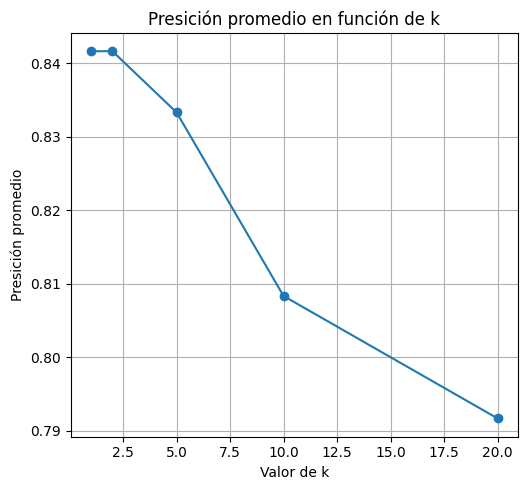

In [18]:
# Graficar la precisión en función k
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(valores_k, accuracies, marker='o')
plt.title("Presición promedio en función de k")
plt.xlabel("Valor de k")
plt.ylabel("Presición promedio")
plt.grid(True)
plt.tight_layout()
plt.show()

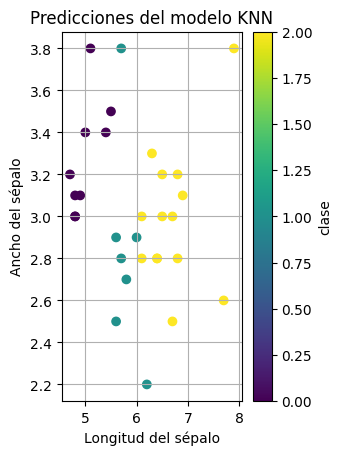

In [23]:
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=preds, cmap='viridis')
plt.title("Predicciones del modelo KNN")
plt.xlabel("Longitud del sépalo")
plt.ylabel("Ancho del sépalo")
plt.colorbar(label="clase")
plt.grid(True)
#plt.tight_layout()
plt.show()